I'm going to focus my analysis on commodities in England to see if we can identify the start of the industrial revolution. 

Generally these are the steps I plan to follow:
* Calculate the Standard Deviation range for each of the commodities in England based on data from 1710 - 1749 (40 years well before IR); 95% of all data points should be within -/+ 2SD of the mean
* Then identify the first year each of these commodities exceeded that range above or below
* The industrial revolution didn't begin before 1750 (Wikipedia puts the start around 1760, what if it started slightly earlier?) and ended around 1820-1840, only commodities exceeding their standard deviation range before 1800 matter
* Make a histogram of the years to visualize the frequency in which commodities diverged from historic ranges

**Results**

The overall average of all of the commodities deviating from their range is 1770 but when we look at the mean and median of the most important commodities we see that they deviated from their 2 standard deviation ranges in 1763 (mean) and 1759 (median). Given the difference of 4 years between the mean and median I believe the median is more informative to us in this case (Clothing-Stockings appears to be an outlier that doesn't exceed its range until 1790).

Wikipedia's start date for the Industrial Revolution beginning in 1760 is re-confirmed by this analysis! I think it would also be possible to argue the Industrial Revolution began slightly before 1760 as the most relevant of the tracked commodities in this database began to diverge from their 2 standard deviation range around 1759.

In [1]:
#importing python modules and checking the data out from Kaggle.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
import math

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

all_commodities.csv
allen-unger_about.pdf



In [2]:
#Creating a dataframe of the imported data from Kaggle.
dataframe = pd.read_csv('../input/all_commodities.csv')
dataframe.head()

,Item Year,Original Value,Standard Value,Original Currency,Standard Currency,Orignal Measure,Standard Measure,Sources,Notes,Location,Commodity,Variety
0,1570,7.65,0.703421,Tours Livre,Silver,Aix Charge,Litre,(Rene Baehrel) (Une croissance: La Basse Prove...,(ECPdb),Aix,Wheat,NaN
1,1571,10.65,0.979272,Tours Livre,Silver,Aix Charge,Litre,(Rene Baehrel) (Une croissance: La Basse Prove...,(ECPdb),Aix,Wheat,NaN
2,1572,8.90,0.818359,Tours Livre,Silver,Aix Charge,Litre,(Rene Baehrel) (Une croissance: La Basse Prove...,(ECPdb),Aix,Wheat,NaN
3,1573,7.75,0.684111,Tours Livre,Silver,Aix Charge,Litre,(Rene Baehrel) (Une croissance: La Basse Prove...,(ECPdb),Aix,Wheat,NaN
4,1574,7.80,0.662043,Tours Livre,Silver,Aix Charge,Litre,(Rene Baehrel) (Une croissance: La Basse Prove...,(ECPdb),Aix,Wheat,NaN


In [3]:
#Setting the year as the index
dataframe2 = dataframe.sort_values(['Item Year'], ascending=[True]).set_index(['Item Year'])

In [4]:
#Subset England
england_dataframe = dataframe2[dataframe2['Location'] == 'England']

In [5]:
#Removing unneccesdary data from the dataframe
england_dataframe = england_dataframe.loc[1710:1800]

In [6]:
#Creating pre-Industrial Revolution dataframe to calculate range
# Creates columns for mean, standard deviation and count
england_pre_rev = england_dataframe.loc[1710:1749].groupby(['Commodity','Variety'], as_index=False).agg({'Standard Value':['mean', 'std', 'count']})

In [7]:
#Renames columns for easier reference
england_pre_rev.columns = ["_".join(x) for x in england_pre_rev.columns.ravel()]
england_pre_rev = england_pre_rev.rename(columns={'Commodity_': 'Commodity', 
                                'Variety_': 'Variety',
                                'Standard Value_mean': 'SV_Mean',
                                'Standard Value_std': 'SV_Std',
                                'Standard Value_count': 'SV_Count',})
england_pre_rev.head()

,Commodity,Variety,SV_Mean,SV_Std,SV_Count
0,Beer,Strong,1.265199,0.062658,40
1,Cloth,Cotton,51.039494,8.631559,3
2,Cloth,Linen,10.821186,0.301375,40
3,Cloth,Wool,50.122590,1.904002,40
4,Clothing,Stockings,9.281957,0.539815,40


In [8]:
#Creating ranges for each Commodity & Variety.
england_pre_rev['Low_-2std'] = england_pre_rev['SV_Mean'] - england_pre_rev['SV_Std'] * 2
england_pre_rev['High_+2std'] = england_pre_rev['SV_Mean'] + england_pre_rev['SV_Std'] * 2
england_pre_rev.head()

,Commodity,Variety,SV_Mean,SV_Std,SV_Count,Low_-2std,High_+2std
0,Beer,Strong,1.265199,0.062658,40,1.139883,1.390516
1,Cloth,Cotton,51.039494,8.631559,3,33.776376,68.302612
2,Cloth,Linen,10.821186,0.301375,40,10.218436,11.423936
3,Cloth,Wool,50.122590,1.904002,40,46.314585,53.930594
4,Clothing,Stockings,9.281957,0.539815,40,8.202328,10.361587


In [9]:
#dropping unnecessary columns
england_pre_rev2 = england_pre_rev.drop(england_pre_rev[['SV_Mean', 'SV_Std', 'SV_Count']], axis=1)
england_pre_rev2.head()

,Commodity,Variety,Low_-2std,High_+2std
0,Beer,Strong,1.139883,1.390516
1,Cloth,Cotton,33.776376,68.302612
2,Cloth,Linen,10.218436,11.423936
3,Cloth,Wool,46.314585,53.930594
4,Clothing,Stockings,8.202328,10.361587


In [10]:
#Creating Industrial Revolution and beyond dataframe, 1750 and beyond
england_ind_rev = england_dataframe.loc[1750:]

In [11]:
#returns Item Year back into a column from an index
england_ind_rev2 = england_ind_rev.reset_index() 
england_ind_rev2.head()

,Item Year,Original Value,Standard Value,Original Currency,Standard Currency,Orignal Measure,Standard Measure,Sources,Notes,Location,Commodity,Variety
0,1750,3.097088,3.033757,English Pence,Silver,England British Pound,Kilogram,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Cheese,NaN
1,1750,24.061932,0.106911,English Pence,Silver,100 bricks,Unit,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Bricks,NaN
2,1750,5.720741,0.211818,English Pence,Silver,Dozen,Unit,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Eggs,NaN
3,1750,130.068652,1.137582,English Pence,Silver,England British Long Hundredweight,Kilogram,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Salt,NaN
4,1750,6.871255,80.768995,English Pence,Silver,England British Pound,Kilogram,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Soap,NaN


In [12]:
#Merging on inner will remove commodities / varieties which didn't have data prior to 1749
#Rather than merge these 2 dataframes maybe it would have made more sense to create a dictionary of
#the standard deviation ranges and reference those in creating the above/below range? Maybe this
#would have been more efficient if my dataset was bigger.

england_ind_rev3 = pd.merge(england_ind_rev2, england_pre_rev2, on=['Commodity','Variety'], how='inner', suffixes=('_Ind_Rev', '_Pre_Rev'))
england_ind_rev3.head()

,Item Year,Original Value,Standard Value,Original Currency,Standard Currency,Orignal Measure,Standard Measure,Sources,Notes,Location,Commodity,Variety,Low_-2std,High_+2std
0,1750,10.575504,1.241310,English Pence,Silver,England British Gallon,Litre,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Beer,Strong,1.139883,1.390516
1,1751,11.058445,1.289868,English Pence,Silver,England British Gallon,Litre,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Beer,Strong,1.139883,1.390516
2,1752,11.067207,1.272609,English Pence,Silver,England British Gallon,Litre,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Beer,Strong,1.139883,1.390516
3,1753,10.758826,1.221623,English Pence,Silver,England British Gallon,Litre,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Beer,Strong,1.139883,1.390516
4,1754,11.058445,1.270679,English Pence,Silver,England British Gallon,Litre,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Beer,Strong,1.139883,1.390516


In [13]:
#Creating columns to identify when we've exceeded the range
england_ind_rev3['Below_Range'] = np.where(england_ind_rev3['Standard Value'] < england_ind_rev3['Low_-2std'], 1, 0)
england_ind_rev3['Above_Range'] = np.where(england_ind_rev3['Standard Value'] > england_ind_rev3['High_+2std'], 1, 0)
england_ind_rev3.head()

,Item Year,Original Value,Standard Value,Original Currency,Standard Currency,Orignal Measure,Standard Measure,Sources,Notes,Location,Commodity,Variety,Low_-2std,High_+2std,Below_Range,Above_Range
0,1750,10.575504,1.241310,English Pence,Silver,England British Gallon,Litre,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Beer,Strong,1.139883,1.390516,0,0
1,1751,11.058445,1.289868,English Pence,Silver,England British Gallon,Litre,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Beer,Strong,1.139883,1.390516,0,0
2,1752,11.067207,1.272609,English Pence,Silver,England British Gallon,Litre,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Beer,Strong,1.139883,1.390516,0,0
3,1753,10.758826,1.221623,English Pence,Silver,England British Gallon,Litre,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Beer,Strong,1.139883,1.390516,0,0
4,1754,11.058445,1.270679,English Pence,Silver,England British Gallon,Litre,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Beer,Strong,1.139883,1.390516,0,0


In [14]:
# Creating a function to identify if either the Below_Range or Above_Range has been exceeded
# Result will be Item Year
def check_range(row):
    if row['Below_Range'] == 1:
        val = row['Item Year']
    elif row['Above_Range'] == 1:
        val = row['Item Year']
    else:
        val = None
    return val

In [15]:
#Running function through dataframe to create a new column
england_ind_rev3['Exceed_Range'] = england_ind_rev3.apply(check_range, axis=1)
england_ind_rev3.head()

,Item Year,Original Value,Standard Value,Original Currency,Standard Currency,Orignal Measure,Standard Measure,Sources,Notes,Location,Commodity,Variety,Low_-2std,High_+2std,Below_Range,Above_Range,Exceed_Range
0,1750,10.575504,1.241310,English Pence,Silver,England British Gallon,Litre,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Beer,Strong,1.139883,1.390516,0,0,NaN
1,1751,11.058445,1.289868,English Pence,Silver,England British Gallon,Litre,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Beer,Strong,1.139883,1.390516,0,0,NaN
2,1752,11.067207,1.272609,English Pence,Silver,England British Gallon,Litre,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Beer,Strong,1.139883,1.390516,0,0,NaN
3,1753,10.758826,1.221623,English Pence,Silver,England British Gallon,Litre,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Beer,Strong,1.139883,1.390516,0,0,NaN
4,1754,11.058445,1.270679,English Pence,Silver,England British Gallon,Litre,(Gregory Clark) (The Long March of History: Fa...,(gpih.ucdavis.edu),England,Beer,Strong,1.139883,1.390516,0,0,NaN


In [16]:
#Checking to see how many times the range was exceeded
england_ind_rev4 = england_ind_rev3.groupby(['Exceed_Range'], as_index=False).agg({'count'})
england_ind_rev4.head()

,Item Year,Original Value,Standard Value,Original Currency,Standard Currency,Orignal Measure,Standard Measure,Sources,Notes,Location,Commodity,Variety,Low_-2std,High_+2std,Below_Range,Above_Range
,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
Exceed_Range,,,,,,,,,,,,,,,,
1750.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1751.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1752.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1753.0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
1754.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [17]:
#Group by Exceed_Range to find first year of exceeding the range
england_ind_rev4 = england_ind_rev3.groupby(['Commodity','Variety'], as_index=False).agg({'Exceed_Range':['min']})

In [18]:
#Renames columns for easier reference
england_ind_rev4.columns = ["_".join(x) for x in england_ind_rev4.columns.ravel()]
england_ind_rev4 = england_ind_rev4.rename(columns={'Commodity_': 'Commodity', 
                                'Variety_': 'Variety'})
england_ind_rev4.head()

,Commodity,Variety,Exceed_Range_min
0,Beer,Strong,1774.0
1,Cloth,Cotton,NaN
2,Cloth,Linen,1759.0
3,Cloth,Wool,1753.0
4,Clothing,Stockings,1790.0


In [19]:
#dropping rows where there are NaN
england_ind_rev5 = england_ind_rev4.dropna(subset = ['Exceed_Range_min'])
#sorting by year
england_ind_rev5 = england_ind_rev5.sort_values('Exceed_Range_min',0)
england_ind_rev5

,Commodity,Variety,Exceed_Range_min
5,Clothing,Suit,1750.0
13,Iron,Manufactured,1750.0
16,Paper,Foolscap,1751.0
3,Cloth,Wool,1753.0
9,Coal,Southern,1755.0
8,Coal,Pithead,1758.0
2,Cloth,Linen,1759.0
17,Rent,Housing,1764.0
19,Silk,Thread,1766.0
22,Wine,Port,1767.0


(array([ 7.,  3.,  6.,  0.,  4.]),
 array([1750, 1760, 1770, 1780, 1790, 1800]),
 <a list of 5 Patch objects>)

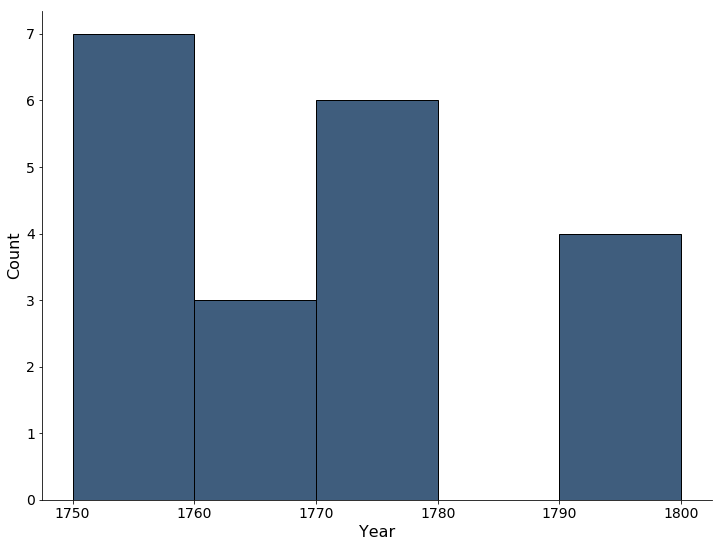

In [20]:
#Creating histogram
plt.figure(figsize=(12, 9))  

# Remove the plot frame lines.
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

# Bins by decade
bins = [1750,1760,1770,1780,1790,1800] 

plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=16)  
plt.ylabel("Count", fontsize=16)  

# "#3F5D7D" is the nice dark blue color.  
plt.hist(list(england_ind_rev5['Exceed_Range_min']), color="#3F5D7D", bins = bins, ec='black')

In [21]:
#finding the average first year that commodity prices exceeded a 2 standard deviation range
england_ind_rev5.Exceed_Range_min.mean()

1769.55

In [22]:
england_ind_rev5.sort_index()

,Commodity,Variety,Exceed_Range_min
0,Beer,Strong,1774.0
2,Cloth,Linen,1759.0
3,Cloth,Wool,1753.0
4,Clothing,Stockings,1790.0
5,Clothing,Suit,1750.0
7,Coal,North,1778.0
8,Coal,Pithead,1758.0
9,Coal,Southern,1755.0
10,Cod,Salt,1799.0
11,Flour,Wheat,1795.0


In [23]:
#Creating a dictionary of how relevant each commodity is to the Industrial Revolution topic
Importance = {}
Importance['Cloth'] = 'High'
Importance['Clothing'] = 'High'
Importance['Coal'] = 'High'
Importance['Iron'] = 'High'
Importance['Rent'] = 'High'
Importance['Oil'] = 'Medium'
Importance['Paper'] = 'Medium'
Importance['Tallow'] = 'Medium'
Importance['Wax'] = 'Medium'
Importance['Beer'] = 'Low'
Importance['Cod'] = 'Low'
Importance['Flour'] = 'Low'
Importance['Shovel'] = 'Low'
Importance['Silk'] = 'Low'
Importance['Wine'] = 'Low'

In [24]:
#Converting the dictionary into a dataframe
Importance = pd.DataFrame(list(Importance.items()), columns=['Commodity', 'Importance'])
Importance

,Commodity,Importance
0,Cloth,High
1,Clothing,High
2,Coal,High
3,Iron,High
4,Rent,High
5,Oil,Medium
6,Paper,Medium
7,Tallow,Medium
8,Wax,Medium
9,Beer,Low


In [25]:
#Merging Importance with the industrial revolution data
england_ind_rev6 = pd.merge(england_ind_rev5, Importance, on=['Commodity'], how='inner', suffixes=('_Ind_Rev', '_Pre_Rev'))
england_ind_rev6.head()

,Commodity,Variety,Exceed_Range_min,Importance
0,Clothing,Suit,1750.0,High
1,Clothing,Stockings,1790.0,High
2,Iron,Manufactured,1750.0,High
3,Iron,Manufactured Items,1772.0,High
4,Paper,Foolscap,1751.0,Medium


In [26]:
#exploring how the mean, median and standard deviation are influenced by the relevance of the commodity
england_ind_rev6.groupby('Importance').agg({'Exceed_Range_min':['mean', 'median','std']})

Exceed_Range_min                   
                       mean  median        std
Importance                                    
High                1762.90  1758.5  13.245125
Low                 1782.50  1784.0  15.136050
Medium              1766.75  1771.5  10.594810

We actually see a very significant impact in when the commodities exceed their 2 standard deviation range based on how relevant they are likely to be to the Industrial Revolution. 

The overall average of all of the commodities deviating from their range is 1770 but when we look at the mean and median of the most important commodities we see that they deviated from their 2 standard deviation ranges in 1763 (mean) and 1759 (median). Given the difference of 4 years between the mean and median I believe the median is more informative to us in this case (Clothing-Stockings appears to be an outlier that doesn't exceed its range until 1790).

Wikipedia's start date for the Industrial Revolution beginning in 1760 is re-confirmed by this analysis! I think it would also be possible to argue the Industrial Revolution began slightly before 1760 as the most relevant of the tracked commodities in this database began to diverge from their 2 standard deviation range around 1759.